# Demonstration of the evomap Package

Replication file for the paper

Matthe, Maximilian (2023), "evomap: A Python Package for Dynamic Mapping". 

Python environment: evomap-package

ToDo List
- Shepard Diagram --> CHeck if order in isotonic regression is really correct? (for shepard diagram AND mds code)

# Setup

In [21]:
import pandas as pd
import numpy as np
import os

PATH_HOME = os.path.dirname(os.getcwd())
PATH_OUT = os.path.join(PATH_HOME, 'gen')

In [22]:
from evomap.datasets import load_tnic_snapshot_small

data = load_tnic_snapshot_small()

In [23]:
title_fontdict = {'size': 12, 'family': 'Arial'}
label_fontdict = {'size': 10, 'family': 'Arial'}

# Load Sample Data

In [24]:
S = data['matrix']
labels = data['labels']
labels

array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'EBAY INC', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'], dtype='<U20')

In [25]:
np.round(S, 2)

array([[0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.06, 0.04, 0.  , 0.07],
       [0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  ],
       [0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.03, 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.03, 0.01, 0.05, 0.  , 0.1 , 0.  , 0.03],
       [0.04, 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.  , 0.03],
       [0.  , 0.08, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.03, 0.  , 0.  ]])

In [26]:
from evomap.preprocessing import sim2diss
D = sim2diss(S, transformation = 'mirror')
np.round(D, 2)

array([[0.  , 0.1 , 0.1 , 0.1 , 0.03, 0.1 , 0.04, 0.06, 0.1 , 0.03],
       [0.1 , 0.  , 0.06, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.02, 0.1 ],
       [0.1 , 0.06, 0.  , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.08, 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.  , 0.1 , 0.01, 0.07, 0.1 , 0.1 , 0.1 ],
       [0.03, 0.1 , 0.1 , 0.1 , 0.  , 0.1 , 0.09, 0.09, 0.1 , 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.01, 0.1 , 0.  , 0.04, 0.09, 0.1 , 0.1 ],
       [0.04, 0.1 , 0.1 , 0.07, 0.09, 0.04, 0.  , 0.  , 0.1 , 0.07],
       [0.06, 0.1 , 0.1 , 0.1 , 0.09, 0.09, 0.  , 0.  , 0.1 , 0.06],
       [0.1 , 0.02, 0.08, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.  , 0.1 ],
       [0.03, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.07, 0.06, 0.1 , 0.  ]])

# Section 1: Static MDS Demonstration

In [27]:
from evomap.mapping import MDS
Y = MDS(mds_type = 'ordinal', init = 'cmds').fit_transform(D)

[MDS] Iteration 25: gradient norm vanished. Final cost: 0.14


In [28]:
from matplotlib import pyplot as plt
from evomap.printer import draw_map

fig, ax = plt.subplots(1,2, figsize = (14,7))
draw_map(
    Y, 
    labels = labels, 
    ax = ax[0])

ax[0].set_title('A: Non-Metric MDS Map \n', fontdict = title_fontdict)
ax[0].set_xlabel('Dimension 1', fontdict = label_fontdict)
ax[0].set_ylabel('Dimension 2', fontdict = label_fontdict)

Text(0, 0.5, 'Dimension 2')

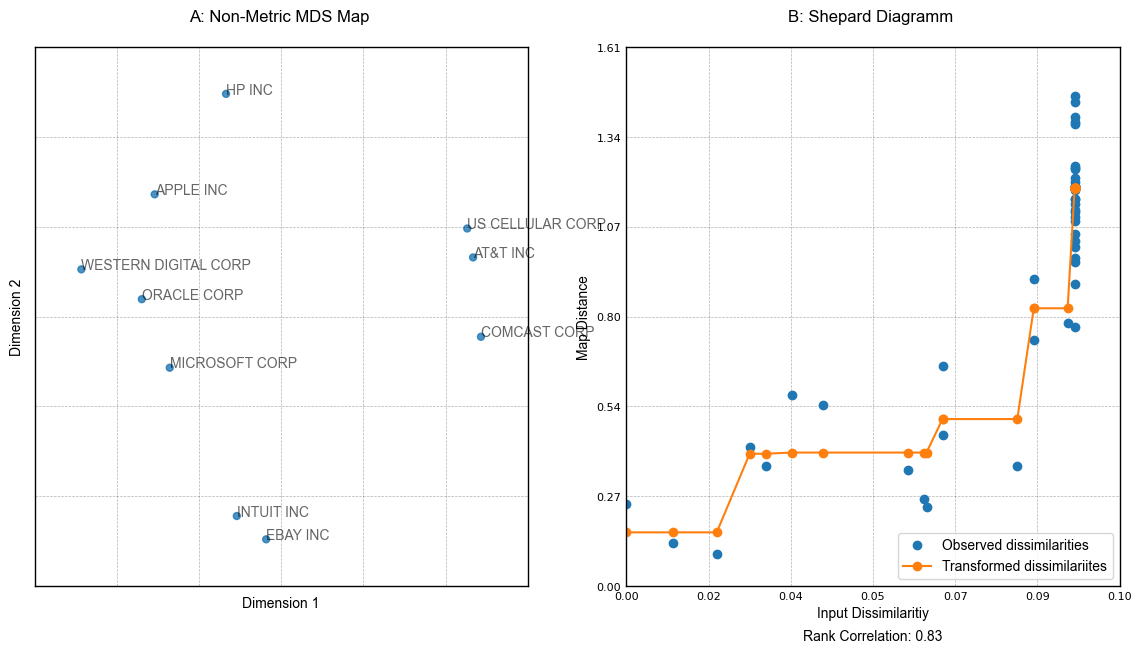

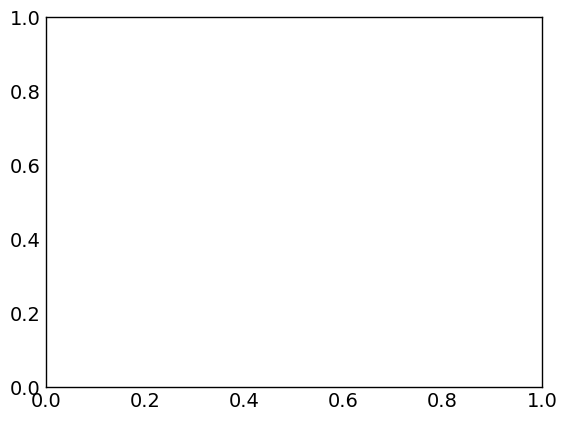

In [29]:
def draw_shepard_diagramm(Y, D, ax = None):
    def normalize_dhat(d_hat, n_samples):
        return d_hat * np.sqrt((n_samples * (n_samples - 1) / 2) / (d_hat**2).sum())
    
    from sklearn.isotonic import IsotonicRegression
    from scipy.spatial.distance import cdist
    from scipy.stats import spearmanr

    D = D.copy()

    if type(Y) == list and type(D) == list:
        all_distances = np.array([])
        all_disparities = np.array([])
        n_periods = len(Y)
        for t in range(n_periods):
            distances = cdist(Y[t], Y[t], metric = 'euclidean')
            distances_flat = distances[np.tril_indices(len(distances),-1)]
            disparities_flat = D[t][np.tril_indices(len(D[t]),-1)]
            all_disparities = np.concatenate(all_disparities, disparities_flat)
            all_distances = np.concatenate(all_distances, distances_flat)        

    else:
        distances = cdist(Y, Y, metric = 'euclidean')
        distances_flat = distances[np.tril_indices(len(distances),-1)]
        disparities_flat = D[np.tril_indices(len(D),-1)]        

    ir = IsotonicRegression()

    disp_hat = ir.fit_transform(y = distances_flat, X = disparities_flat)
    disp_hat = normalize_dhat(disp_hat, Y.shape[0])
    df = pd.DataFrame({'disp': disparities_flat, 'dist': distances_flat, 'disp_hat' : disp_hat})
    df = df.sort_values('disp')

    from matplotlib.ticker import FuncFormatter

    def format_tick_labels(x, pos):
        return '{0:.2f}'.format(x)

    if ax is None:
        fig, ax = plt.subplots(figsize = (5,5))

    ax.plot(df['disp'], df['dist'], "C0.", markersize = 12)
    ax.plot(df['disp'], df['disp_hat'], "C1.-", markersize = 12)
    ax.set_xlabel('Input Dissimilaritiy', fontdict= label_fontdict)
    ax.set_ylabel('Map Distance', fontdict = label_fontdict)
    y_min = 0
    y_max = df['dist'].max() * 1.1
    x_min = df['disp'].min() * .9
    x_max = df['disp'].max() * 1.1
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    y_ticks = np.linspace(y_min, y_max, 7)
    x_ticks = np.linspace(x_min, x_max, 7)

    ax.set_yticks(y_ticks)
    ax.set_xticks(x_ticks)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
    ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

    ax.text(0.5, -0.1, 
           "Rank Correlation: {0:.2f}".format(spearmanr(df['disp'], df['dist'])[0]), 
           ha = 'center', 
           transform = ax.transAxes, 
           fontdict = label_fontdict)
    
    plt.grid(False)
    return df

df = draw_shepard_diagramm(Y,D, ax[1])
ax[1].set_title('B: Shepard Diagramm \n', fontdict= title_fontdict)
ax[1].legend(['Observed dissimilarities', 'Transformed dissimilariites'], loc = 4, prop = label_fontdict)
fig.savefig(os.path.join(PATH_OUT, 'sect1_mds_statc.PNG'), dpi = 300)
fig

In [38]:
from evomap.datasets import load_tnic_sample_small
data = load_tnic_sample_small()
#labels = data[data['sic1'].map(lambda x: x.startswith("36"))].groupby('name1').agg({'year':'nunique'}).query('year == 20').index.values
#labels = [label for label in labels if not label == "CALAMP CORP"] # Exclude calamp corp, as it has no connections to the others in one period
#labels
labels = np.array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'EBAY INC', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'])

In [57]:
data = data.query('name1 in @labels').query('name2 in @labels')
data = data[['year', 'name1', 'name2', 'score']]
data = data.sort_values(['year', 'name1'])
data = data.query('year >= 2000').query('year <= 2011')
data.groupby('year').agg({'name1': 'nunique'})

,name1
year,
2000,9
2001,9
2002,9
2003,9
2004,9
2005,9
2006,9
2007,9
2008,9


In [58]:
periods = data.year.unique()

In [59]:
from evomap.preprocessing import edgelist2matrix
matrix, label = edgelist2matrix(data, score_var= 'score', id_var_i= 'name1', id_var_j= 'name2')

In [60]:
def edgelist2matrices(data, score_var, id_var_i, id_var_j, time_var):
    periods = data[time_var].unique()
    matrices = []
    for period in periods:
        data_t = data[data[time_var] == period]
        mat_t, labels = edgelist2matrix(data_t, 
                                        score_var = score_var,
                                         id_var_i = id_var_i, 
                                         id_var_j = id_var_j)
        matrices.append(mat_t)
    return matrices, label

S_t, lables = edgelist2matrices(data, score_var= 'score', id_var_i = 'name1', id_var_j='name2', time_var='year')

In [61]:
D_t = []
for S in S_t:
    D_t.append(sim2diss(S, transformation = 'mirror'))

In [62]:
Y_0 = MDS(
    mds_type= 'ordinal',
    init = 'cmds', 
    verbose = 2).fit_transform(D_t[0])


[MDS] Initialization 1/1
[MDS] Running Gradient Descent with Backtracking via Halving
[MDS] Iteration 29: gradient norm vanished. Final cost: 0.15


In [63]:
Y_1 = MDS(
    mds_type= 'ordinal',
    init = 'cmds', 
    verbose = 2).fit_transform(D_t[2])


[MDS] Initialization 1/1
[MDS] Running Gradient Descent with Backtracking via Halving
[MDS] Iteration 23: gradient norm vanished. Final cost: 0.19


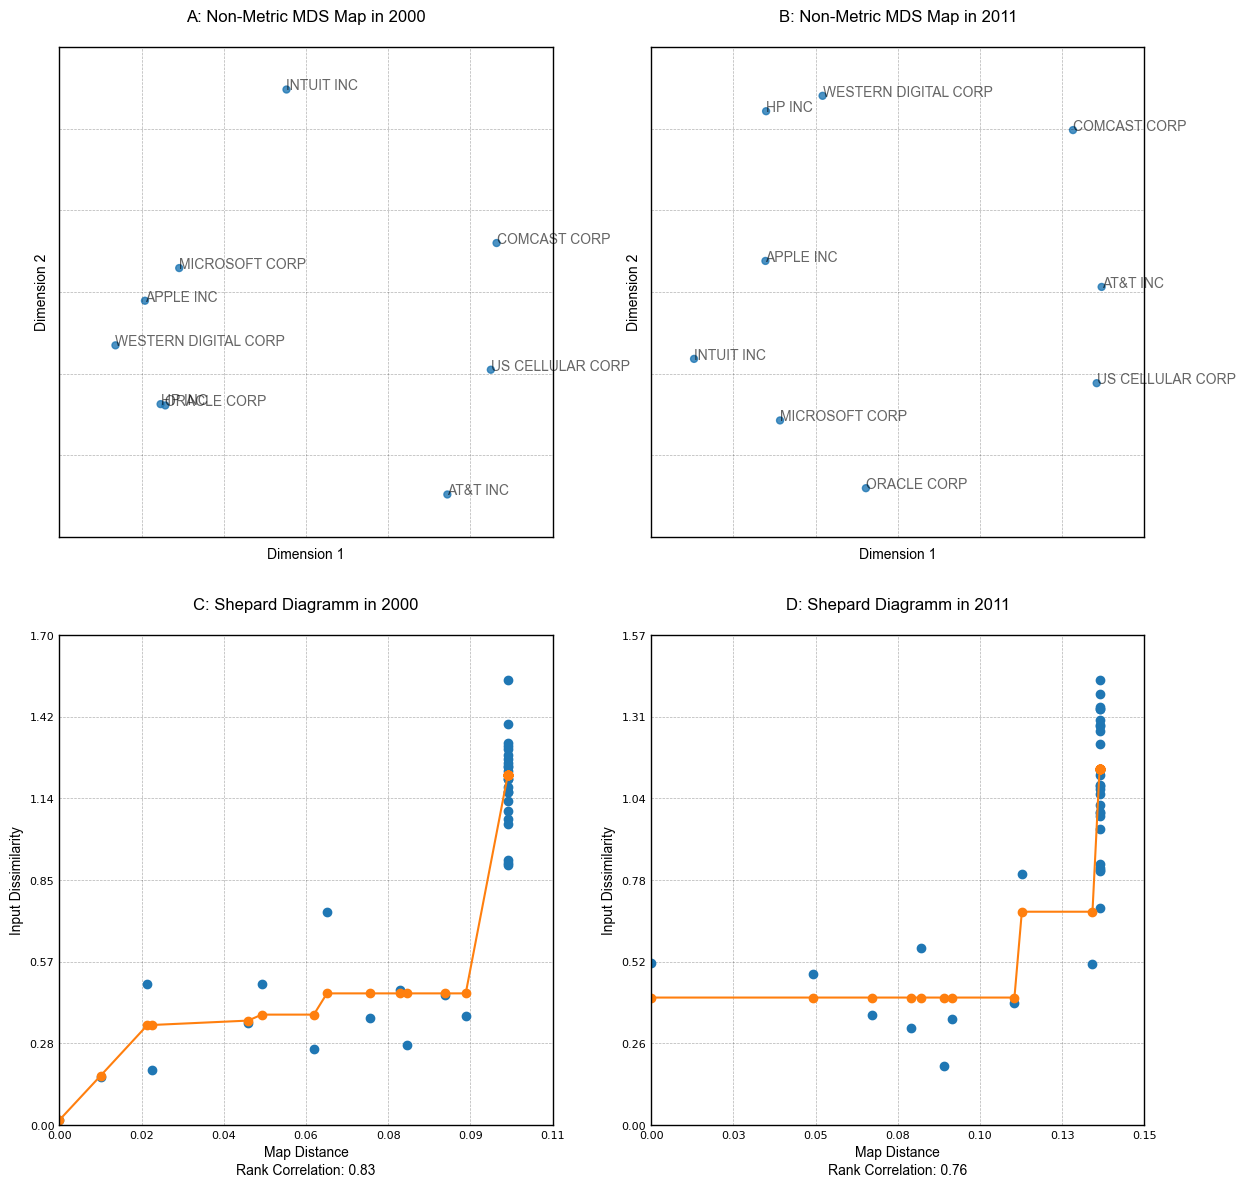

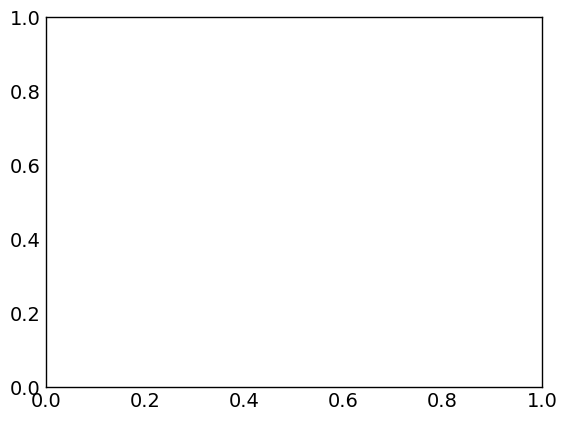

In [65]:
fig, ax = plt.subplots(2,2,figsize = (14,14))
draw_map(Y_0, labels = label, ax = ax[0,0])
ax[0,0].set_title('A: Non-Metric MDS Map in {0}\n'.format(periods[0]), fontdict = title_fontdict)
ax[0,0].set_xlabel('Dimension 1', fontdict = label_fontdict)
ax[0,0].set_ylabel('Dimension 2', fontdict = label_fontdict)

draw_map(Y_1, labels = label, ax = ax[0,1])
ax[0,1].set_title('B: Non-Metric MDS Map in {0}\n'.format(periods[-1]), fontdict = title_fontdict)
ax[0,1].set_xlabel('Dimension 1', fontdict = label_fontdict)
ax[0,1].set_ylabel('Dimension 2', fontdict = label_fontdict)

draw_shepard_diagramm(Y_0, D_t[0], ax[1,0])
ax[1,0].set_title('C: Shepard Diagramm in {0}\n'.format(periods[0]), fontdict = title_fontdict)
ax[1,0].set_xlabel('Map Distance', fontdict = label_fontdict)
ax[1,0].set_ylabel('Input Dissimilarity', fontdict = label_fontdict)

draw_shepard_diagramm(Y_1, D_t[2], ax[1,1])
ax[1,1].set_title('D: Shepard Diagramm in {0}\n'.format(periods[-1]), fontdict = title_fontdict)
ax[1,1].set_xlabel('Map Distance', fontdict = label_fontdict)
ax[1,1].set_ylabel('Input Dissimilarity', fontdict = label_fontdict)
fig.savefig(os.path.join(PATH_OUT, 'sect1_mds_dynamic.PNG'), dpi = 300)
fig

# Dynamic Mapping Example

In [66]:
from evomap.mapping import CMDS
n_samples = D_t[0].shape[0]
n_periods = len(D_t)
Y_inits = []
for t in range(n_periods):
    Y_inits.append(CMDS().fit_transform(D_t[t]))

In [77]:
from evomap.mapping import EvoMDS

X_t = EvoMDS(alpha = 0.5,
             mds_type = 'ordinal',
             n_iter_check = 50, 
             init = Y_inits,
             verbose = 2).fit_transform(D_t) 

[EvoMDS] Initialization 1/1
[EvoMDS] Running Gradient Descent with Backtracking via Halving
[EvoMDS] Iteration 50 -- Cost: 3.55 -- Gradient Norm: 0.1789
[EvoMDS] Iteration 100 -- Cost: 3.04 -- Gradient Norm: 0.0035
[EvoMDS] Iteration 150 -- Cost: 3.08 -- Gradient Norm: 0.0019
[EvoMDS] Iteration 200 -- Cost: 3.10 -- Gradient Norm: 0.0010
[EvoMDS] Iteration 202: gradient norm vanished. Final cost: 3.10


array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'HP INC', 'INTUIT INC',
       'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'], dtype=object)

# Temporary Printer Module

In [98]:
"""
Useful functions to draw maps.
"""

from multiprocessing.sharedctypes import Value
from unittest.mock import DEFAULT
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from cycler import cycler

DEFAULT_BUBBLE_SIZE = 25
DEFAULT_FONT_SIZE = 10

from matplotlib.ticker import FormatStrFormatter

def shepard_diagram(Y, X, labels = None, ax = None):
    # X: Distance matrix
    from scipy.spatial.distance import cdist
    n_samples = Y.shape[0]
    D = cdist(Y,Y)
    combinations = []
    distances_data = []
    distances_map = []
    for i in range(n_samples):
        for j in range(n_samples):
            if i < j:
                if not labels is None:
                    combinations.append(str(labels[i] + " - " + str(labels[j])))
                else:
                    combinations.append(0)
                distances_data.append(X[i,j])
                distances_map.append(D[i,j])
    df_plot = pd.DataFrame({
        'combinations' : combinations, 
        'dist_map': distances_map,
        'dist_data': distances_data})
    if ax is None:
        fig, ax = plt.subplots(figsize = (4,4))
    sns.regplot(
        x = 'dist_data', 
        y = 'dist_map', 
        marker = 'x',
        fit_reg= False,
        data = df_plot, 
        ax = ax)   

    if not labels is None:
        for i, combi in enumerate(combinations):
            ax.text(distances_data[i], distances_map[i], combi, fontdict = {'size': 8, 'alpha': .4})

    ax.set_xlabel("Input Distances", fontdict = {'size': 8})
    ax.set_ylabel("Map Distances", fontdict = {'size': 8})
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xticks(np.linspace(x_min, x_max, 7))
    ax.set_yticks(np.linspace(y_min, y_max, 7))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    
    from scipy.stats import spearmanr, pearsonr
    rank_corr = np.round(spearmanr(distances_data, distances_map)[0],4)
    corr = np.round(pearsonr(distances_data, distances_map)[0],4)
    ax.text(
        x= .5, 
        y=-0.2, 
        s='Rank correlation: {0} \n Pearson Correlation: {1}'.format(np.round(rank_corr,4), np.round(corr,4)), 
        fontsize=8, 
        alpha=0.75, 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)
    ax.set_title("Shepard Diagram", fontdict = {'size': 10})


def style_axes(ax, show_axes):
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    # Make axes square
    max_range = np.max([xmax-xmin, ymax-ymin]) * 1.1
    x_mean = xmin + (xmax - xmin)/2
    y_mean = ymin + (ymax - ymin)/2

    xmin = x_mean - max_range/2
    xmax = x_mean + max_range/2
    ymin = y_mean - max_range/2
    ymax = y_mean + max_range/2

    ax.set_xticks(np.linspace(xmin, xmax, 7))
    ax.set_yticks(np.linspace(ymin, ymax, 7))

    if show_axes:
        ax.xaxis.set_ticklabels(np.round(np.linspace(xmin, xmax, 7), 3), fontsize = 6)
        ax.yaxis.set_ticklabels(np.round(np.linspace(ymin, ymax, 7),3), fontsize = 6)
    else:
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])


def draw_map(Y, c = None, size = None, labels = None, highlight_labels = None, inclusions = None, 
    zoom_on_cluster = None, annotate = None, filename = None, ax = None, 
    fig_size = None, show_box = True, cmap = None, rcparams = None, title_str = None,
    fontdict = None, show_axes = False, title_fontdict = None, rotate_labels = 0, scatter_kws = {}):
    """ Draw a single (static) map. Can take additional scatterplot arguments
    as kwargs, see https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

    Parameters
    ----------
    Y : ndarray of shape (n_samples, d)
        Map coordinates. If d = 1, the resultant map is a line. If d > 2, 
        only the first two dimensions are visualized.
    c : ndarray of shape (n_samples,), optional
        Cluster assignments used for coloring (int), by default None
    labels : ndarray of shape (n_samples,), optional
        Object labels (str), by default None
    highlight_labels: list, optional
        Labels which should be highligted on the map, by default None
    inclusions : ndarray of shape (n_samples,), optional
        Inlcusion array. A 0 indicates that the object should be excluded on the map, 
        a 1 indicates that the object should be included in the map , by default None
    zoom_on_cluster : int, optional
        Cluster number on which the map should be zoomed-in to, by default None
    annotate : str, optional
        Annotations, either None, 'labels', or 'clusters', by default None
    filename : str, optional
        Filename to which the map is saved, by default None
    ax : matplotlib.axes.Axes, optional
        Pre-existing axes for the plot., by default None
    fig_size : tuple (int,int), optional
        Figure size, by default None
    show_box : bool, optional
        If true, a box is drawn around the map, by default True
    cmap : str, optional
        The colormap for coloring the cluster assignments. Should be a valid
        colormap Name, or a custom colormap function by default None
    rcparams : dict, optional
        Dictionary of matplotlib rcParams, by default None
    fontdict : dict, optional
        Dictionary defining the label font, by default None

    """

    # Check inputs:
    if not annotate in [None, 'clusters', 'labels']:
        raise ValueError("'annotate' should be 'clusters' or 'labels'")

    if annotate == 'labels' and labels is None:
        labels = [str(i) for i in range(Y.shape[0])]

    if not labels is None:
        labels = np.array(labels)
        annotate = 'labels'

    if not highlight_labels is None:
        # In case a single label is given, put it into a list
        if type(highlight_labels) == str:
            highlight_labels = [highlight_labels]
        if labels is None and len(highlight_labels) > 0:
            raise ValueError('Need to provide labels.')
        if not all(highlighted_label in labels for highlighted_label in highlight_labels):
            raise ValueError('All highlighted labels need to be contained in the labels array.')
    else:
        highlight_labels = []

    if Y.shape[1] == 1 and rotate_labels == 0:
        rotate_labels = 45

    n_samples = len(Y)
    if len(Y.shape) == 1:
        Y = Y.reshape((n_samples,1))
        Y = np.concatenate([Y, np.ones((n_samples,1))], axis = 1)

    if Y.shape[1] > 2:
        print('Input array is not two-dimensional. Only first two dimensions will be plotted')
    if Y.shape[1] == 1:
        Y = np.concatenate([Y, np.zeros_like(Y)], axis = 1)
    # Data preparation:
    if fontdict is None:
        if annotate == 'clusters':
            fontdict = {'family': 'Arial', 'size': DEFAULT_FONT_SIZE*2}
        else:
            fontdict = {'family': 'Arial', 'size': DEFAULT_FONT_SIZE}

    if c is None:
        c = np.zeros((n_samples, 1))
    else:
        c = np.array(c)
    c_labels = np.unique(c)
    c = np.array([np.where(c_labels == clust)[0][0] for clust in c]).reshape((n_samples, 1))

    df_data = pd.DataFrame(
        data = np.hstack([Y, c]), 
        columns = ['x','y','cluster'])

    df_data['cluster'] = df_data['cluster'].map(int)

    df_data['label'] = labels
    if not inclusions is None: 
        df_data = df_data[inclusions == 1]
    
    if not size is None:
        df_data['size'] = size
    else:
        df_data['size'] = DEFAULT_BUBBLE_SIZE

    # Zoom in on cluster - if necessary:
    if not zoom_on_cluster is None:
        df_data = df_data[df_data['cluster'] == zoom_on_cluster]

    # Check if only valid cluster indices are included
    if len(df_data[df_data['cluster']<0]) >0:
        raise ValueError("Some cluster indices are smaller than 0")

    # Explicitly calculate colors to avoid erroneous coloring
    if cmap is None:
        if len(np.unique(c)) <= 10:
            cmap = "tab10"
        elif len(np.unique(c)) <= 15:
            cmap = mpl.cm.get_cmap('tab10')
            hex = []
            for i in range(10):
                hex.append(mpl.colors.rgb2hex(cmap(i)))

            hex.append('#ffff33')
            hex.append('#b9ff66')
            hex.append('#cdb7f6')

            cmap = ListedColormap(hex) 

        else:
            cmap = "tab20"
            print("More than 20 clusters. Will include duplicate colors unless custom colormap is provided.")

    if type(cmap) == str:
        cmap = mpl.cm.get_cmap(cmap)
    
    df_data['color'] = df_data['cluster'].map(cmap)

    # Draw map
    init_params(rcparams)

    if ax is None:
        return_fig = True
        if fig_size is None:
            fig_size = (5,5)
        fig, ax = plt.subplots(figsize = fig_size)
    else:
        return_fig = False

    scatter_kws.update(
        {'facecolors': df_data['color'], 'edgecolors': df_data['color']})

    scatter_kws['s'] = df_data['size']

    p = sns.regplot(
            x = 'x', 
            y = 'y',
            data = df_data, 
            fit_reg= False, 
            scatter_kws = scatter_kws,
            ax = ax)

    if title_fontdict is None:
        title_fontdict = {'weight': 'normal', 'size': fontdict['size']*1.2}
    if len(highlight_labels) > 0:
        fontdict.update({'size': fontdict['size']*0.8})
        highlighted_fontdict = fontdict.copy()
        highlighted_fontdict.update({'weight': 'bold', 'size': fontdict['size']*1.2})

    if annotate == 'clusters':
        cluster_means = df_data.groupby('cluster').mean()
        for i in range(len(cluster_means)):
            clust = cluster_means.iloc[i].name
            shift = 0.01*np.std(df_data, axis = 0)

            p.text(cluster_means.iloc[i][0] + shift[0],
                cluster_means.iloc[i][1] + shift[1], 
                c_labels[clust],
                color = cmap(clust),
                alpha = .6,fontdict = fontdict)

    elif annotate == 'labels' or annotate == 'points':

        if len(highlight_labels) > 0:
            # Only print highlighted labels
            for i in range(len(df_data)):
                if labels[i] in highlight_labels:
                    p.text(
                        df_data['x'].iloc[i], 
                        df_data['y'].iloc[i], 
                        df_data['label'].iloc[i], 
                        alpha = 1,
                        rotatation = rotate_labels, 
                        fontdict = highlighted_fontdict)
                else:
                    continue
        else:
            # Print all labels
            for i in range(len(df_data)):
                p.text(
                    df_data['x'].iloc[i], 
                    df_data['y'].iloc[i], 
                    df_data['label'].iloc[i], 
                    alpha = .6,
                    rotation = rotate_labels, 
                    fontdict = fontdict)

    for highlighted_label in highlight_labels:
        df_i = df_data.query('label == @highlighted_label')        
        if len(df_i)>0:
            p.text(df_i['x'].iloc[0], df_i['y'].iloc[0], df_i['label'].iloc[0], alpha = 1, fontdict = highlighted_fontdict)

    ax.set_ylabel("")
    ax.set_xlabel("")
    
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    style_axes(ax, show_axes)

    if not title_str is None:
        ax.set_title(title_str, title_fontdict)

    if show_box == False:
        plt.box(on = None)
    else:
        plt.box(on = True)

    # Save or show plot 
    if not filename == None:
        mydpi = 300
        fig.savefig(filename, dpi = mydpi, format = 'png')

    plt.close()
    if return_fig:
        return fig

def draw_map_sequence(Y_ts, c_ts = None, inclusions = None, n_cols = 4, time_labels = [], show_axes = False, **kwargs):
    """ Draw a sequence of static maps next to each other. Can use the same
    arguments as the 'draw_map' function as dictionary.

    Parameters
    ----------
    Y_ts : list of ndarrays, each of shape (n_samples, d)
        Sequence of map coordinates.
    c_ts : list of ndarray, each of shape (n_samples,), optional
        Sequence of cluster assignments used for coloring (int), by default None
        If the cluster assignments are constant, one can simply provide a single 
        array as kwarg.
    n_cols : int, optional
        Max. number of maps shown in one row, by default 4
    map_kws : dict, optional
        Additional arguments for the 'draw_map' function, by default None
    time_labels: list of str, optional
        When given, use these labels as title strings
    """
    n_periods = len(Y_ts)
    n_rows = int(np.ceil(n_periods/n_cols))
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (4*n_cols, 4*n_rows))
        

    if len(time_labels) == 0:
        time_labels = ["Period " + str(t+1) for t in range(n_periods)]

    draw_map_kws = {}
    draw_map_args = draw_map.__code__.co_varnames[:draw_map.__code__.co_argcount]
    for key, value in kwargs.items():
        if key in draw_map_args:
            draw_map_kws.update({key: value})

    row = 0
    col = 0
    ymin, ymax , xmin, xmax = np.inf,-np.inf,np.inf,-np.inf

    for t in range(n_periods):
        if n_rows > 1:
            draw_map_kws.update({
                'Y': Y_ts[t],
                'ax': axs[row, col]
            })
        else:
            draw_map_kws.update({
                'Y': Y_ts[t],
                'ax': axs[col]
            })
        if not c_ts is None:
            draw_map_kws.update({'c': c_ts[t]})
        if not time_labels is None:
            draw_map_kws.update({'title_str': time_labels[t]})

        if not inclusions is None:
            draw_map_kws.update({'inclusions': inclusions[t]})

        draw_map(**draw_map_kws)            
        if not inclusions is None:            
            ymin_i, ymax_i = np.min(Y_ts[t][inclusions[t] == 1, 1]), np.max(Y_ts[t][inclusions[t] == 1, 1])
            xmin_i, xmax_i = np.min(Y_ts[t][inclusions[t] == 1, 0]), np.max(Y_ts[t][inclusions[t] == 1, 0])
        else:
            ymin_i, ymax_i = np.min(Y_ts[t][:, 1]), np.max(Y_ts[t][:, 1])
            xmin_i, xmax_i = np.min(Y_ts[t][:, 0]), np.max(Y_ts[t][:, 0])
            
        if ymin_i < ymin:
            ymin = ymin_i
        if xmin_i < xmin:
            xmin = xmin_i
        if ymax_i > ymax:
            ymax = ymax_i
        if xmax_i > xmax:
            xmax = xmax_i
        
        if col < n_cols - 1:
            col += 1
        else: 
            row += 1
            col = 0

    # Make axes square
    max_range = np.max([xmax-xmin, ymax-ymin]) * 1.1
    x_mean = xmin + (xmax - xmin)/2
    y_mean = ymin + (ymax - ymin)/2

    xmin = x_mean - max_range/2
    xmax = x_mean + max_range/2
    ymin = y_mean - max_range/2
    ymax = y_mean + max_range/2

    row = 0
    col = 0
    for t in range(n_periods):
        if n_rows > 1:       
            axs[row,col].set_xlim(xmin, xmax)
            axs[row,col].set_ylim(ymin,ymax)
            axs[row, col].set_xticks(np.linspace(xmin, xmax, 7))
            axs[row, col].set_yticks(np.linspace(ymin, ymax, 7))
            if show_axes:
                axs[row, col].xaxis.set_ticklabels(np.round(np.linspace(xmin, xmax, 7), 3), fontsize = 6)
                axs[row, col].yaxis.set_ticklabels(np.round(np.linspace(ymin, ymax, 7),3), fontsize = 6)
            else:
                axs[row, col].xaxis.set_ticklabels([])
                axs[row, col].yaxis.set_ticklabels([])

        else:
            axs[col].set_xlim(xmin, xmax)
            axs[col].set_ylim(ymin,ymax)
            axs[col].set_xticks(np.linspace(xmin, xmax, 7))
            axs[col].set_yticks(np.linspace(ymin, ymax, 7))
            if show_axes:
                axs[col].xaxis.set_ticklabels(np.round(np.linspace(xmin, xmax, 7), 3), fontsize = 6)
                axs[col].yaxis.set_ticklabels(np.round(np.linspace(ymin, ymax, 7),3), fontsize = 6)
            else:
                axs[col].xaxis.set_ticklabels([])
                axs[col].yaxis.set_ticklabels([])

        if col < n_cols - 1:
            col += 1
        else: 
            row += 1
            col = 0




    return fig

def fit_attribute(coords, attribute_label, attribute_values, map):
    """ Fit an attribute to the map and display the resultant vector.

    To do so, regress the attribute value on map coordinates and use
    the coefficients as arrow coordinates.

    Parameters
    ----------
    coords : ndarray of shape (n_samples, n_dims)
        Map coordinates.
    attribute_label : string
        Attribute label (displayed next to vector).
    attribute_values : ndarray of shape (n_samples,)
        Attribute values for each sample.
    map : matplotlib.figure
        Figure containing the map (i.e., output of draw_map function)

    Returns
    -------
    matplotlib.figure
        Figure containing the map with property vector added.
    """
    import statsmodels.api as sm
    SCALE = 10
    ax = map.axes[0]
    X = coords
    y = attribute_values
    est=sm.OLS(y, X)
    result = est.fit().params
    result['x1']
    result['x2']
    ax.arrow(0,0,result['x1']*SCALE,result['x2']*SCALE, linestyle = '--', lw = .25, alpha = .75, width = .001, color = 'grey',  head_width = 0.1)
    ax.text(result['x1']*1.1*SCALE, result['x2']*1.1*SCALE, attribute_label, fontdict= {'size': 8, 'color': 'darkblue', 'weight': 'normal'})
    return map

def fit_attributes(map_coords, df_attributes, map):
    """ Fit multiple attributes and display their vectors in the map.

    Parameters
    ----------
    map_coords : ndarray of shape (n_samples, n_dims)
        Map coordinates.
    df_attributes : pd.DataFrame
        Dataframe containing the attributes. Each column is expected to 
        correspond to one attribute. Make sure to label colums and 
        that the number of rows equals n_samples.
    map : matplotlib.figure
        Figure containing the map (i.e., output of draw_map function)

    Returns
    -------
    matplotlib.figure
        Figure containing the map with property vectors added.
    """

    for attribute in df_attributes.columns:
        map = fit_attribute(
            coords = map_coords, 
            attribute_label = attribute,
            attribute_values = df_attributes[attribute], 
            map = map)
    return map

def draw_dynamic_map(Y_ts, c_ts = None, incl_ts = None, show_arrows = False, 
    show_last_positions_only = False, highlight_trajectories = None, 
    time_labels = None, transparency_start = 0.1, transparency_end = 0.4, 
    transparency_final = 1.,**kwargs):
    """ Draw a dynamic map, jointly visualizing all object's map coordinates
    over time. Can take all arguments of 'draw_map' as kwargs. 

    Parameters
    ----------
    Y_ts : list of ndarrays, each of shape (n_samples, d)
        Sequence of map coordinates.
    c_ts : list of ndarray, each of shape (n_samples,), optional
        Sequence of cluster assignments used for coloring (int), by default None
        If the cluster assignments are constant, one can simply provide a single 
        array as kwarg.
    incl_ts : list of ndarrays, each of shape (n_samples, ), optional
        Sequence of inclusion arrays, each indicating if an object is present
        in period t (via 0 and 1s), by default None
    show_arrows : bool, optional
        If true, objects' subsequent positions are connected by arrows, by default False
    show_last_positions_only : bool, optional
        If true, only the map positions for the last period are displayed. Should
        be combined with 'show arrows = True', by default False
    highlight_trajectories : list, optional
        Labels for which trajectories should be highlighted, by default None
    transparency_start : float, optional
        Transparency of bubbles for first period, by default 0.1
    transparency_end : float, optional
        Transparency of bubbles for second-last period, by default 0.4
    transparency_final : float, optional
        transparency of bubbles for last period, by default 1.

    """

    # Check inputs
    n_periods = len(Y_ts)
    n_samples = Y_ts[0].shape[0]
    if np.any([Y_t.shape != Y_ts[0].shape for Y_t in Y_ts]):
        raise ValueError('All input arrays need to be of similar shape.')

    if not c_ts is None:
        if np.any([c_t.shape[0] != n_samples for c_t in c_ts]):
            raise ValueError('Misshaped class arrays.')

    if not incl_ts is None:
        if np.any([incl_t.shape[0] != n_samples for incl_t in incl_ts]):
            raise ValueError('Misshaped inclusion arrays.')

    else:
        incl_ts = [np.repeat(1,n_samples)]*n_periods

    # Data preparation
    transparencies = np.linspace(transparency_start, transparency_end, n_periods-1).tolist()
    transparencies.append(transparency_final)
  
    highlight_colors = ['darkred', 'orange', 'darkgreen', 'slategrey']

    if not 'labels' in kwargs.keys():
        labels = np.array([str(i+1) for i in range(n_samples)])
    else:
        labels = np.array(kwargs['labels'])

    if not time_labels is None:
        labels = [label + " " + time_labels[i] for i, label in enumerate(time_labels)]

    # Highlight labels are only shown in last period - so safe them now for later
    labels_to_highlight = []
    if not highlight_trajectories is None:
        labels_to_highlight = np.concatenate((labels_to_highlight, highlight_trajectories))

    if 'highlight_labels' in kwargs.keys():
        labels_to_highlight = np.concatenate((labels_to_highlight, kwargs['highlight_labels']))

    if len(labels_to_highlight) >0:
        labels_to_highlight = np.unique(labels_to_highlight)
    
    if 'annotate' in kwargs.keys():
        annotate = kwargs['annotate']
    else: 
        annotate = None

    # Draw map
    draw_map_kws = {}
    draw_map_args = draw_map.__code__.co_varnames[:draw_map.__code__.co_argcount]
    for key, value in kwargs.items():
        if key in draw_map_args:
            draw_map_kws.update({key: value})    

    # Prepare figure
    if not 'ax' in kwargs.keys():
        if 'fig_size' in kwargs.keys():
            fig_size = kwargs['fig_size']
        else:
            fig_size = (5,5)
            
        fig, ax = plt.subplots(figsize = fig_size)
        draw_map_kws.update({'ax': ax})    
    
    # Plot each period
    for t in range(n_periods):

        draw_map_kws.update({
            'Y': Y_ts[t], 
            'inclusions': incl_ts[t], 
            'filename': None, 
            'title_str': None,
            'scatter_kws': {'alpha': transparencies[t]}})

        # Only show labels for the last period
        if t < n_periods - 1:
            draw_map_kws.update({
                'annotate': None, 
                'highlight_labels': None})
        else:
            draw_map_kws.update({
                'annotate': annotate, 
                'highlight_labels': labels_to_highlight})

            if 'title_str' in kwargs.keys():
                draw_map_kws.update({'title_str': kwargs['title_str']})
            
        if not c_ts is None:
            draw_map_kws.update({'c' : c_ts[t]})

        if t < n_periods-1:
            draw_map_kws.update({'labels': None})

        if not (t < n_periods -1  and show_last_positions_only):
            p = draw_map(**draw_map_kws)

            if not highlight_trajectories is None:
                highlight_count = 0
                highlight_indices = [np.where(labels == label)[0][0] for label in highlight_trajectories]
                for i in highlight_indices:
                    x = Y_ts[t][:,0][i]
                    y = Y_ts[t][:,1][i]
                    sns.regplot(
                        x = [x], 
                        y = [y],
                        fit_reg=False, 
                        scatter_kws={
                            'zorder': 10,
                            'alpha': transparencies[t], 
                            'facecolors': highlight_colors[highlight_count], 
                            'edgecolor': highlight_colors[highlight_count]})
                    highlight_count += 1


        if (t > 0) and show_arrows:

            arrow_starts_x = Y_ts[t-1][:,0]
            arrow_starts_y = Y_ts[t-1][:,1]
            deltas_x = Y_ts[t][:,0] - Y_ts[t-1][:,0]
            deltas_y = Y_ts[t][:,1] - Y_ts[t-1][:,1]

            highlight_count = 0
            if not highlight_trajectories is None:
                arrow_indices = [np.where(labels == label)[0][0] for label in highlight_trajectories]
            else:
                arrow_indices = np.array([i for i in range(n_samples)])

            for i in arrow_indices:
                # In case of zooming, only print arrows for objects within this cluster
                if 'zoom_on_cluster' in kwargs.keys():
                    if not kwargs['zoom_on_cluster'] is None:
                        if str(draw_map_kws['c'][i]) != str(kwargs['zoom_on_cluster']):
                            continue

                if (incl_ts[t][i] == 1) and (incl_ts[t-1][i] == 1):
                    if not (deltas_x[i] * deltas_y[i]) == 0:
                        if not highlight_trajectories is None:
                            col = highlight_colors[highlight_count]
                            arrow_size = .005
                            alpha = transparencies[t-1]
                            highlight_count +=1
                        else:
                            col = 'grey'
                            alpha = transparencies[t-1]
                            arrow_size = .005
                        ax.plot(
                            [Y_ts[t-1][i,0], Y_ts[t][i,0]],
                            [Y_ts[t-1][i,1], Y_ts[t][i,1]],
                            color = 'grey', alpha = alpha,
                            linewidth = 1)
                        """
                        ax.arrow(
                            arrow_starts_x[i],
                            arrow_starts_y[i],
                            deltas_x[i],
                            deltas_y[i],
                            width = 0.01,
                            head_width = 0,
                            head_length = 0,
                            fc = col,
                            ec = col,
                            length_includes_head = True,
                            alpha = alpha)
                        """

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    ax.set_xticks(np.linspace(xmin, xmax, 7))
    ax.set_yticks(np.linspace(ymin, ymax, 7))

    if 'filename' in kwargs.keys():
        fig.savefig(kwargs['filename'], dpi = 300, format = "png")

    plt.close()
    return fig

def draw_trajectories(Y_ts, labels, selected_labels = None, title_str = None, 
    annotate_periods = True, period_labels = None, ax = None, figsize = None):
    """ Draw the trajectories of selected objects.

    Parameters
    ----------
    Y_ts : list of ndarrays, each of shape (n_samples, d)
        Sequence of map coordinates.
    labels : ndarray of shape (n_samples,)
        Object labels (str)
    selected_labels : ndarray of shape (n_selected,), optional
        Selected object labels (str), by default None
    title_str : str, optional
        Figure title, by default None
    annotate_periods : bool, optional
        If true, labels for each period are shown next to each pair of map 
        coordinates, by default True
    period_labels : ndarray of shape (n_periods,), optional
        Period labels (str), by default None
    ax : matplotlib.axes.Axes, optional
        Pre-existing axes for the plot, by default None
    figsize : tuple, optional
        Figure size, by default (12,12)
    """

    n_periods = len(Y_ts)
    n_firms = Y_ts[0].shape[0]
    if selected_labels == None:
        selected_labels = labels

    if ax is None:
        if figsize is None:
            figsize = (5,5)
        fig, ax = plt.subplots(figsize = figsize)   

    annotations = []

    if period_labels is None and annotate_periods == True:
        period_labels = ["Period " + str(t+1) for t in range(n_periods)]

    for i in range(n_firms):
        if not labels[i] in selected_labels:
            continue
        xs = []
        ys = []
        # Plot the points
        for t in range(n_periods):
            alpha = 1 - (n_periods - t) / n_periods
            alpha = alpha * .5
            x = Y_ts[t][i,0]
            y = Y_ts[t][i,1]
            c = 'black'
            c_line = 'grey'
            label = labels[i]
            ax.scatter(x,y , c = c, alpha = alpha)
            xs.append(x)
            ys.append(y)
            if t == n_periods - 1:
                label = ax.text(x ,y , label, c = c, alpha = .7, fontsize = DEFAULT_FONT_SIZE)
                annotations.append(label)

            elif annotate_periods:
                label = ax.text(x ,y , period_labels[t], c = c_line, alpha = .5, fontsize = DEFAULT_FONT_SIZE * 0.8)
#               texts.append(label)

        # Plot the trajectory
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.plot(xs, ys, c = c_line, alpha = .4)

    style_axes(ax, False)

    if not title_str is None:
        ax.set_title(title_str, fontsize = DEFAULT_FONT_SIZE)
#    adjust_text(texts, force_points = 0.15,  arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))
    plt.close()
    return ax

def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

def rotate_map(Y_2D):
    Y_PCA = PCA(Y_2D, num_components=2)
    return Y_PCA

def rotate_maps(Y, inclusions):
    """Rotate a map (or sequence of maps) such that the x-axis corresponds to 
    the direction of maximum variance.

    Parameters
    ----------
    Y : _type_
        _description_
    """

    n_samples = Y[0].shape[0]
    n_dims = Y[0].shape[1]
    n_periods = len(Y)
    Y = np.vstack(Y)
    Y_rotated = np.zeros_like(Y)
    inc = np.hstack(inclusions)
    Y_rotated[inc == 1, :] = rotate_map(Y[inc==1, :])
    Y_rotated_list = []
    for t in range(n_periods):
        Y_rotated_list.append(Y_rotated[t*n_samples:(t+1)*n_samples, :])

    return Y_rotated_list

def init_params(custom_params = None):
    """
    Set default aesthetic styles here. References: Matplotlib RC params

    """

    mpl.rcParams.update(
        {"axes.prop_cycle": cycler('color', [
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
            "#9467bd",
            "#8c564b",
            "#e377c2",
            "#7f7f7f",
            "#bcbd22",
            "#17becf"]),
        "font.size": 14,
        "axes.linewidth": 0,
        "axes.titlesize": 22,
        "axes.labelsize": 16,

        "axes.edgecolor": "black",
        "axes.linewidth": 1,

        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "xtick.major.size": 0.1,
        "xtick.minor.size": 0.05,
        "ytick.major.size": 0.1,
        "ytick.minor.size": 0.05,

        "axes.grid": True,
        "grid.alpha": 0.3,
        "grid.linewidth": 0.5,
        "grid.linestyle": "--",
        "grid.color": "black",

        "savefig.facecolor": "w",
        "savefig.transparent": False,
        "savefig.bbox": "tight",
        "savefig.format": "png"
        }
        )

    if not custom_params is None:
        mpl.rcParams.update(custom_params)




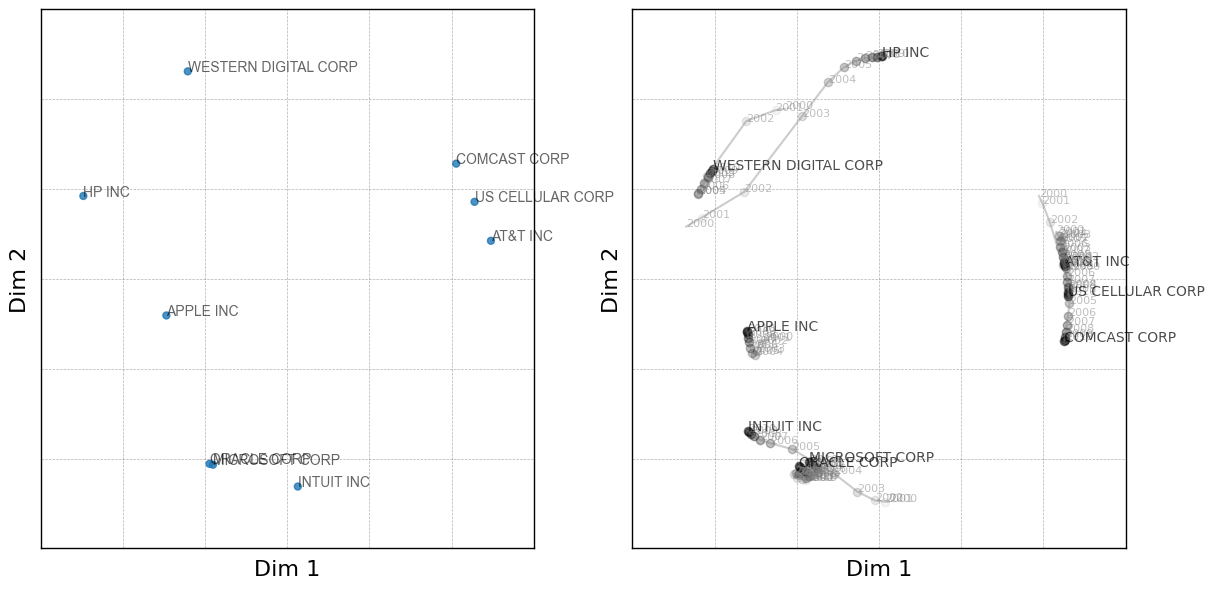

In [100]:
fig, ax = plt.subplots(1,2,figsize = (14,7))
draw_map(X_t[0], labels = data.name1.unique(), annotate = 'labels', ax = ax[0])
draw_trajectories(X_t, labels = data.name1.unique(), period_labels= periods, ax = ax[1])
ax[0].set_xlabel("Dim 1")
ax[1].set_xlabel("Dim 1")
ax[0].set_ylabel("Dim 2")
ax[1].set_ylabel("Dim 2")
fig

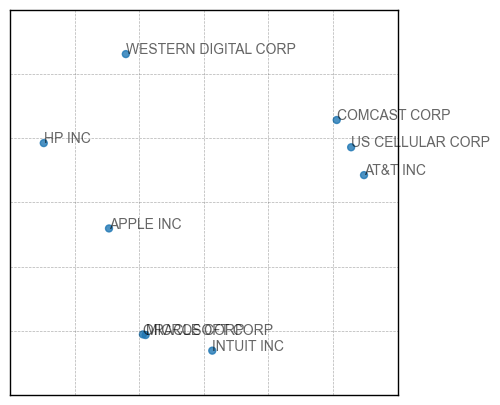

In [83]:
draw_map(X_t[0], labels = data.name1.unique(), annotate = 'labels')

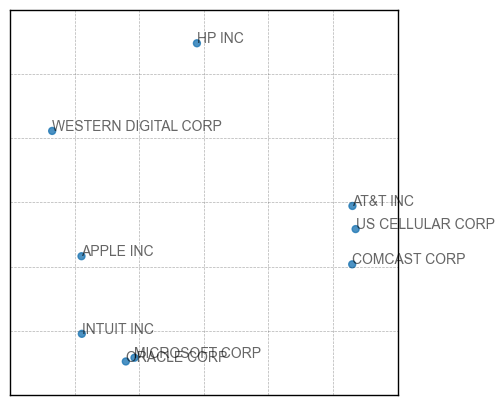

In [85]:
draw_map(X_t[-1], labels = data.name1.unique(), annotate = 'labels')

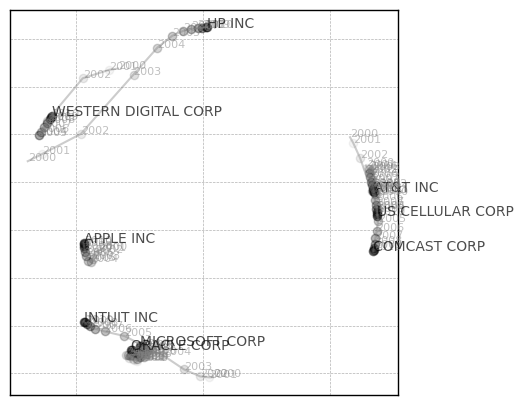

In [89]:
draw_trajectories(X_t, labels = data.name1.unique(), period_labels= periods)

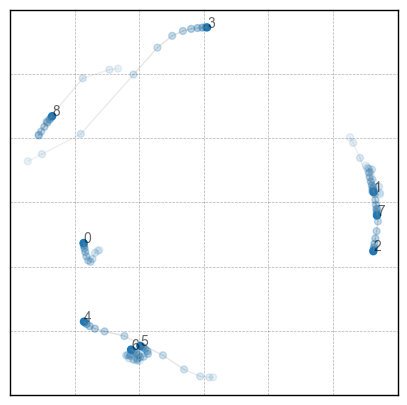

In [84]:
from evomap.printer import draw_dynamic_map
draw_dynamic_map(X_t, show_arrows=True, labels = data.name1.unique(), annotate = 'labels')

In [ ]:
def plot_evolving_party_positions(results, inclusions, timestamps = None, title_str = "", filename = ""):
    fig, ax = plt.subplots(figsize = (10,10))
    n_periods = len(results)
    for t, result in enumerate(results): 
        for i in range(len(result)):
            if inclusions[t][i] == 1:
                if n_periods > 1:
                    size = [25]
                else:
                    size = [100]
                ax.scatter(result[i, 0], result[i,1], c = palette[party_labels[i]], marker = markers[party_labels[i]], s = size)
                if t == len(results) -1 :
#                    if n_periods > 1:
#                        ax.text(result[i, 0], result[i,1], timestamps[t], size = 10, alpha = .5)
#                    else:
                    if n_periods < 48:
                        ax.text(result[i, 0], result[i,1], party_labels[i], size = 20, alpha = 1, c = palette[party_labels[i]])

                
                if t > 0:
                    if inclusions[t-1][i] == 1:
                        x1 = results[t-1][i,0]
                        x2 = results[t][i,0]
                        y1 = results[t-1][i,1]
                        y2 = results[t][i,1]

                        plt.plot([x1, x2], [y1,y2], c = palette[party_labels[i]])


    ax.set_xticklabels(ax.get_xticklabels(), fontdict = fontdict)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict = fontdict)
    ax.set_title(title_str, fontdict = fontdict.update({'fontsize': 20}))


    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_linewidth(.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(False)

    x_range = [-1.3, 1.3]
    y_range = [-1.3, 1.3]

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

    # Set the number of xticks and the tick positions
    num_ticks = 7
    x_tick_positions = np.linspace(x_range[0], x_range[1], num_ticks)
    y_tick_positions = np.linspace(y_range[0], y_range[1], num_ticks)

    # Set the xticks and labels
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels([f'{x:.1f}' for x in x_tick_positions])

    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels([f'{x:.1f}' for x in y_tick_positions])
    ax.tick_params(axis='both', which='major', labelsize=8, labelcolor='grey')

    if not filename == "":
        fig.savefig(os.path.join(PATH_AUDIT, filename), dpi = 300)

plot_evolving_party_positions(
    results, 
    inclusions, 
    all_timestamps, 
    all_timestamps[0] + " - " + all_timestamps[-1],
    "monthly_positions_all.PNG")

In [ ]:
from evomap.metrics import align_score
align_score(X_t)

In [ ]:
draw_map(X_t[0], labels = labels)

In [ ]:
draw_map(X_t[-1], labels = labels)

In [ ]:
all_disparities

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

Y = X_t.copy()
D = D_t.copy()

from sklearn.isotonic import IsotonicRegression
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

if type(Y) == list and type(D) == list:
    distances_flat = np.array([])
    disparities_flat = np.array([])
    n_periods = len(Y)
    for t in range(n_periods):
        distances = cdist(Y[t], Y[t], metric = 'euclidean')
        distances_flat_t = distances[np.tril_indices(len(distances),-1)]
        disparities_flat_t = D[t][np.tril_indices(len(D[t]),-1)]
        disparities_flat = np.concatenate([disparities_flat, disparities_flat_t])
        distances_flat = np.concatenate([distances_flat, distances_flat_t])        

else:
    distances = cdist(Y, Y, metric = 'euclidean')
    distances_flat = distances[np.tril_indices(len(distances),-1)]
    disparities_flat = D[np.tril_indices(len(D),-1)]        

ir = IsotonicRegression()

disp_hat = ir.fit_transform(distances_flat, disparities_flat)
df = pd.DataFrame({'disp': disparities_flat, 'dist': distances_flat, 'disp_hat' : disp_hat})
df = df.sort_values('dist')

from matplotlib.ticker import FuncFormatter

def format_tick_labels(x, pos):
    return '{0:.2f}'.format(x)

if ax is None:
    fig, ax = plt.subplots(figsize = (5,5))

ax.plot(df['disp'], df['dist'], "C0.", markersize = 12)
ax.plot(df['disp_hat'], df['dist'], "C1.-", markersize = 12)
ax.set_xlabel('Input Dissimilaritiy', fontdict= label_fontdict)
ax.set_ylabel('Map Distance', fontdict = label_fontdict)
x_min = 0
x_max = df['disp_hat'].max() * 1.1
y_min = 0
y_max = df['dist'].max() * 1.1
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
y_ticks = np.linspace(y_min, y_max, 7)
x_ticks = np.linspace(x_min, x_max, 7)

ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.tick_params(axis = 'both', labelsize = 8)
ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

ax.text(0.5, -0.1, 
        "Rank Correlation: {0:.2f}".format(spearmanr(df['dist'], df['disp_hat'])[0]), 
        ha = 'center', 
        transform = ax.transAxes, 
        fontdict = label_fontdict)

plt.grid(False)


In [ ]:
all_disparities